In [1]:
%run "/Users/cloclo/Desktop/Python/Accidents-corporels/Ouverture_donnees.ipynb"

/Users/cloclo/Desktop/Python/Accidents-corporels/Ouverture_donnees.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "source": [


In [10]:
import seaborn as sns

In [75]:
colonne = ["lum", "agglo", "sexe", "int", "collision", "atm", "surf", "circ"]
def regroupement_modalites():
    for elem in colonne :
        frequence = df[elem].value_counts()/len(df[elem])*100
        for i in range(len(frequence)) :
            if frequence[i] < 5 :
                df.loc[df[elem]==frequence.index[i], elem] = "Autre"   
regroupement_modalites()

## Diagramme en barres

In [81]:
def diag_barres_cumulees_grav(df, variable) :
    df_crosstab = pd.crosstab(df[variable], df.gravite).reset_index().melt(id_vars=[variable], value_vars=[1, 2], var_name = "gravite", value_name = "Nombre d'accidents")
    sns.barplot(x=variable, y="Nombre d'accidents", data=df_crosstab, hue = "gravite", dodge=False)

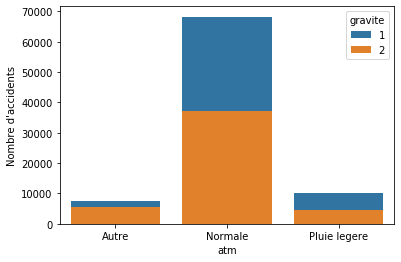

In [85]:
diag_barres_cumulees_grav(df, "atm")

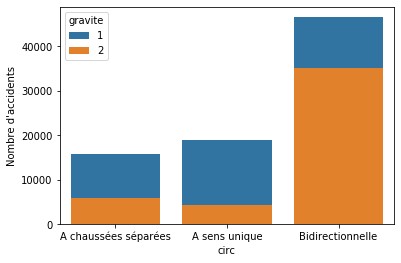

In [86]:
diag_barres_cumulees_grav(df, "circ")

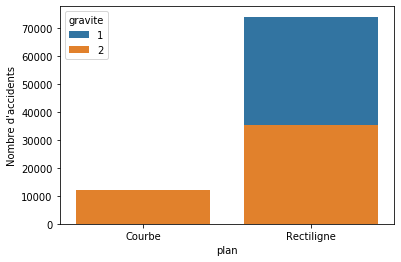

In [87]:
diag_barres_cumulees_grav(df, "plan")

## Camemberts

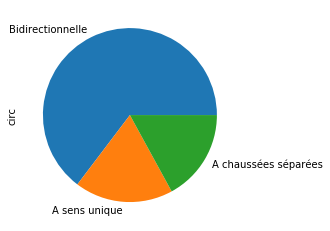

In [7]:
df.circ.value_counts().plot.pie()

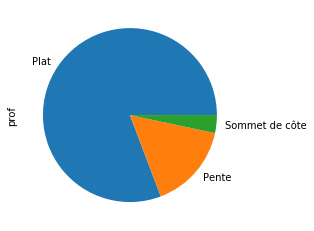

In [8]:
df.prof.value_counts().plot.pie()